In [14]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import json

In [15]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])

df = df[556*2:2260]
df = df[df['migration_barriers'] < 1.1]
df[((df['energy_difference'] - df['energy_difference'].mean()) / df['energy_difference'].std()).abs() < 2]
df[((df['migration_barriers'] - df['migration_barriers'].mean()) / df['migration_barriers'].std()).abs() < 2]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')
df

Dimensionality 1521 42


,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end
1112,556,Mg,0.597351,0.074046,0.560328,-860.772478,-860.698433,"[0.0, 1.0, 0.0, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0...","[0.0, 1.0, 0.0, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0...","[1190.0, 146.0, 54.0, 75.0, 54.0, 5.0, 582.0, ...","[1190.0, 145.0, 54.0, 76.0, 54.0, 5.0, 582.0, ..."
1113,556,Mg,0.523305,-0.074046,0.560328,-860.698433,-860.772478,"[0.0, 1.0, 0.0, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0...","[0.0, 1.0, 0.0, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0...","[1190.0, 145.0, 54.0, 76.0, 54.0, 5.0, 582.0, ...","[1190.0, 146.0, 54.0, 75.0, 54.0, 5.0, 582.0, ..."
1114,557,Mg,0.767524,0.107621,0.713714,-860.772478,-860.664857,"[0.0, 1.0, 0.0, 0.0, 0.25, 0.75, 0.0, 1.0, 0.0...","[0.0, 1.0, 0.0, 0.0, 0.25, 0.75, 0.0, 1.0, 0.0...","[1190.0, 146.0, 54.0, 75.0, 54.0, 5.0, 582.0, ...","[1190.0, 145.0, 54.0, 75.0, 55.0, 5.0, 582.0, ..."
1115,557,Mg,0.659903,-0.107621,0.713714,-860.664857,-860.772478,"[0.0, 1.0, 0.0, 0.0, 0.25, 0.75, 0.0, 1.0, 0.0...","[0.0, 1.0, 0.0, 0.0, 0.25, 0.75, 0.0, 1.0, 0.0...","[1190.0, 145.0, 54.0, 75.0, 55.0, 5.0, 582.0, ...","[1190.0, 146.0, 54.0, 75.0, 54.0, 5.0, 582.0, ..."
1116,558,Mg,0.331511,0.073641,0.294690,-860.772478,-860.698838,"[0.0, 0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0...","[0.0, 0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0...","[1190.0, 146.0, 54.0, 75.0, 54.0, 5.0, 582.0, ...","[1190.0, 145.0, 54.0, 75.0, 55.0, 5.0, 582.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
2255,1127,Zn,0.242831,-0.064467,0.275064,-918.902771,-918.967238,"[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[1375.0, 0.0, 134.0, 0.0, 0.0, 15.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0...."
2256,1128,Zn,0.266368,0.008176,0.262280,-918.967238,-918.959061,"[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0...."
2257,1128,Zn,0.258192,-0.008176,0.262280,-918.959061,-918.967238,"[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0...."
2258,1129,Al,0.543555,0.108872,0.489119,-918.967238,-918.858366,"[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1373.0, 0.0, 138.0, 0.0, 0.0, 13.0, 689.0, 0...."


In [16]:
df = df.sample(frac=1)
df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
# df_copy = df

In [17]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end
count,1144.000000,1144.000000,1.144000e+03,1144.000000,1144.000000,1144.000000
mean,842.944056,0.485603,3.881899e-19,0.485603,-901.931481,-901.931481
std,165.792417,0.182359,9.947889e-02,0.175445,28.480996,28.480996
min,556.000000,0.001193,-4.850860e-01,0.049129,-950.776122,-950.776122
25%,699.750000,0.346538,-5.144575e-02,0.356217,-922.086782,-922.086782
50%,843.500000,0.492658,0.000000e+00,0.490785,-907.659025,-907.659025
75%,986.250000,0.611949,5.144575e-02,0.609962,-881.590827,-881.590827
max,1129.000000,1.065212,4.850860e-01,0.936171,-834.771244,-834.771244


In [18]:
x, y = np.stack(df_copy['energy_encode_start']), np.array(df_copy['energy_start'])

x_Al, y_Al = np.stack(df[df['migration_atom'] == 'Al']['one_hot_encode_forward']), \
               np.array(df[df['migration_atom'] == 'Al']['e0'])
x_Mg, y_Mg = np.stack(df[df['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
               np.array(df[df['migration_atom'] == 'Mg']['e0'])
x_Zn, y_Zn = np.stack(df[df['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
               np.array(df[df['migration_atom'] == 'Zn']['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
#                        np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
#                        np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
#                        np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [19]:
print(x.shape)
print(x_Al.shape)
print(x_Mg.shape)
print(x_Zn.shape)

(809, 42)
(562, 1521)
(282, 1521)
(300, 1521)


In [20]:
cache_contents = open('kmc_parameters.json', 'r').read()
parameters = json.loads(cache_contents)

mu_x_Al, mean_y_Al = np.array(parameters['Al']['mu_x']), np.array(parameters['Al']['mean_y'])
mu_x_Mg, mean_y_Mg = np.array(parameters['Mg']['mu_x']), np.array(parameters['Mg']['mean_y'])
mu_x_Zn, mean_y_Zn = np.array(parameters['Zn']['mu_x']), np.array(parameters['Zn']['mean_y'])


U_Al = np.array(parameters['Al']['transform_matrix']).T
U_Mg = np.array(parameters['Mg']['transform_matrix']).T
U_Zn = np.array(parameters['Zn']['transform_matrix']).T

theta = np.array(parameters['Bond']['theta'])

theta_Al = np.array(parameters['Al']['theta'])

theta_Mg = np.array(parameters['Mg']['theta'])

theta_Zn = np.array(parameters['Zn']['theta'])

In [21]:
x_Al, y_Al = (x_Al - mu_x_Al).dot(U_Al), y_Al - mean_y_Al
x_Mg, y_Mg = (x_Mg - mu_x_Mg).dot(U_Mg), y_Mg - mean_y_Mg
x_Zn, y_Zn = (x_Zn - mu_x_Zn).dot(U_Zn), y_Zn - mean_y_Zn

In [22]:
def pred_energy_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_start']))

def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return (np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al))+
               np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Al).dot(U_Al)))/2  + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return (np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg))+
               np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Mg).dot(U_Mg)))/2 + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return (np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn))+
               np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Zn).dot(U_Zn)))/2  + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_end'])) - np.inner(theta, np.asarray(row['energy_encode_start']))

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(row['predicted_de'])
                                                                                                               
df['predicted_energy'] = df.apply(lambda row: pred_energy_ls(row), axis=1)

df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)


df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['predicted_e0'] + 0.5*df['predicted_de']

rmse test 1.2947222582774118


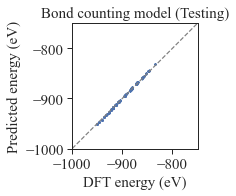

In [23]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-1000, -700, 100), yticks=np.arange(-1000, -700, 100))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles('')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df['energy_start'], df['predicted_energy'])))

rmse test 0.1867964220496997


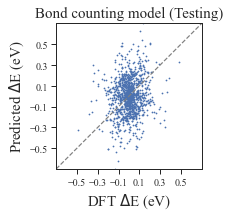

In [24]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\Delta$E (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df['energy_difference'], df['predicted_de'])))

rmse test 0.2013455954433792


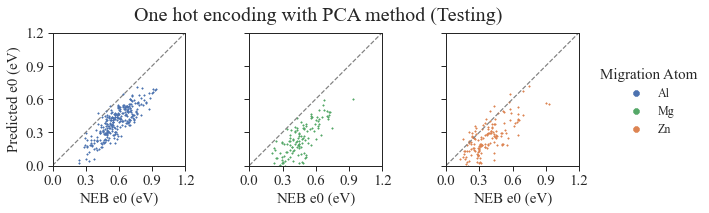

In [25]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df['e0'], df['predicted_e0'])))

rmse test 0.2219533163237065


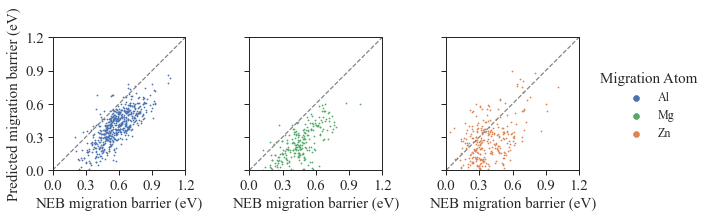

In [26]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df['migration_barriers'], df['predicted_barrier'])))

In [27]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,predicted_energy,predicted_e0,predicted_de,predicted_barrier
1897,948,Al,0.610388,0.009701,0.605538,-936.697994,-936.688294,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[1434.0, 86.0, 0.0, 4.0, 0.0, 0.0, 715.0, 47.0...","[1435.0, 85.0, 0.0, 4.0, 0.0, 0.0, 715.0, 47.0...",-937.686415,0.403031,0.004954,0.405508
1245,622,Mg,0.483846,-0.048820,0.508256,-859.254575,-859.303394,"[0.0, 0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0...","[0.0, 0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0...","[1190.0, 82.0, 117.0, 47.0, 58.0, 30.0, 582.0,...","[1190.0, 83.0, 117.0, 44.0, 60.0, 30.0, 582.0,...",-857.524260,0.096671,0.098903,0.146123
2253,1126,Zn,0.272541,-0.039685,0.292384,-918.927552,-918.967238,"[0.25, 0.0, 0.75, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....",-918.279584,0.154350,0.173253,0.240977
1440,720,Mg,0.535014,0.011061,0.529483,-895.950907,-895.939846,"[0.25, 0.75, 0.0, 0.25, 0.25, 0.5, 0.0, 1.0, 0...","[0.25, 0.75, 0.0, 0.25, 0.25, 0.5, 0.0, 1.0, 0...","[1276.0, 158.0, 44.0, 30.0, 16.0, 0.0, 636.0, ...","[1276.0, 160.0, 44.0, 29.0, 15.0, 0.0, 636.0, ...",-895.486134,0.250118,-0.139708,0.180264
2163,1081,Al,0.474630,0.071428,0.438916,-908.644735,-908.573307,"[0.25, 0.0, 0.75, 0.75, 0.0, 0.25, 1.0, 0.0, 0...","[0.25, 0.0, 0.75, 0.75, 0.0, 0.25, 1.0, 0.0, 0...","[1337.0, 0.0, 165.0, 0.0, 0.0, 22.0, 664.0, 0....","[1334.0, 0.0, 168.0, 0.0, 0.0, 22.0, 665.0, 0....",-907.457936,0.170870,-0.135793,0.102974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,704,Mg,0.511627,0.093401,0.464927,-872.214593,-872.121192,"[0.0, 0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0...","[0.0, 0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0...","[1217.0, 143.0, 62.0, 56.0, 38.0, 8.0, 601.0, ...","[1217.0, 143.0, 62.0, 53.0, 41.0, 8.0, 601.0, ...",-870.883734,0.266922,-0.127588,0.203128
1874,937,Al,0.595466,-0.027773,0.609352,-936.738080,-936.765853,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[1433.0, 88.0, 0.0, 3.0, 0.0, 0.0, 718.0, 42.0...","[1434.0, 87.0, 0.0, 3.0, 0.0, 0.0, 717.0, 43.0...",-937.792036,0.432317,0.039410,0.452022
2116,1058,Al,0.595412,-0.026607,0.608715,-911.778624,-911.805231,"[0.75, 0.25, 0.0, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[0.75, 0.25, 0.0, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[1334.0, 95.0, 72.0, 5.0, 14.0, 4.0, 667.0, 46...","[1335.0, 94.0, 72.0, 5.0, 14.0, 4.0, 665.0, 46...",-911.347198,0.429791,0.199306,0.529444
1809,904,Al,0.560424,-0.040563,0.580706,-927.280564,-927.321127,"[0.75, 0.25, 0.0, 0.25, 0.75, 0.0, 1.0, 0.0, 0...","[0.75, 0.25, 0.0, 0.25, 0.75, 0.0, 1.0, 0.0, 0...","[1395.0, 116.0, 0.0, 13.0, 0.0, 0.0, 697.0, 60...","[1397.0, 114.0, 0.0, 13.0, 0.0, 0.0, 696.0, 61...",-927.932387,0.411520,-0.012267,0.405387
